In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset=pd.read_csv("Salary_Data.csv")

In [3]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.shape

(30, 2)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

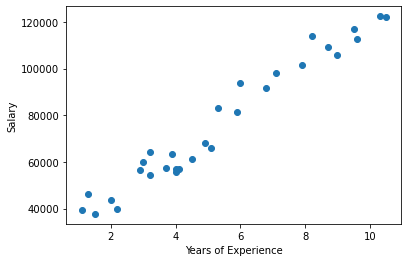

In [8]:
plt.scatter(dataset["YearsExperience"],dataset["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [9]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [10]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [13]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [14]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

# Linear Regression

In [15]:
LR=LinearRegression() 
LR.fit(x_train,y_train)

LinearRegression()

In [17]:
pred_LR=LR.predict(x_test)

In [18]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [19]:
pred_LR

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [20]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [21]:
diff_LR=y_test-pred_LR
res_df=pd.concat([pd.Series(pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['prediction','Original data','difference']

In [22]:
res_df

,prediction,Original data,difference
0,40835.105909,37731.0,-3104.105909
1,123079.399408,122391.0,-688.399408
2,65134.556261,57081.0,-8053.556261
3,63265.367772,63218.0,-47.367772
4,115602.645454,116969.0,1366.354546
5,108125.891499,109431.0,1305.108501
6,116537.239698,112635.0,-3902.239698
7,64199.962017,55794.0,-8405.962017
8,76349.687193,83088.0,6738.312807
9,100649.137545,101302.0,652.862455


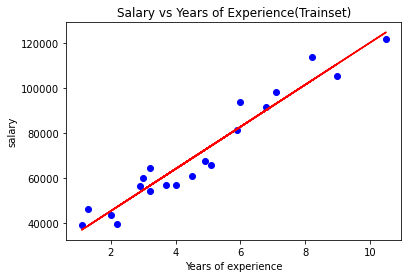

In [23]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title("Salary vs Years of Experience(Trainset)")
plt.xlabel("Years of experience")
plt.ylabel("salary")
plt.show()

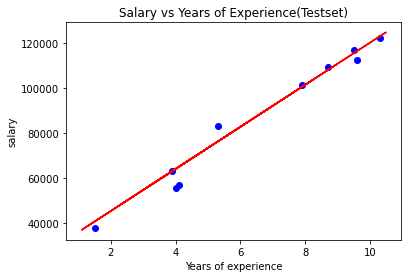

In [24]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title("Salary vs Years of Experience(Testset)")
plt.xlabel("Years of experience")
plt.ylabel("salary")
plt.show()

In [25]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred_LR))
rmse

4585.4157204675885

In [26]:
LR.predict([[10]])

array([120275.61667525])

# Decision Tree

In [27]:
DT=DecisionTreeRegressor()

In [28]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [30]:
pred_DT=DT.predict(x_test)

In [31]:
pred_DT

array([ 46205., 121872.,  56957.,  56957., 105582., 105582., 105582.,
        56957.,  66029., 113812.])

In [32]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [33]:
diff_DT=y_test-pred_DT
res_dT=pd.concat([pd.Series(pred_DT),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_dT.columns=['prediction','Original data','difference']

In [34]:
res_dT

,prediction,Original data,difference
0,46205.0,37731.0,-8474.0
1,121872.0,122391.0,519.0
2,56957.0,57081.0,124.0
3,56957.0,63218.0,6261.0
4,105582.0,116969.0,11387.0
5,105582.0,109431.0,3849.0
6,105582.0,112635.0,7053.0
7,56957.0,55794.0,-1163.0
8,66029.0,83088.0,17059.0
9,113812.0,101302.0,-12510.0


In [35]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [36]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred_DT))
R2=metrics.r2_score(y_test,pred_DT)

In [37]:
rmse

8685.499772609519

In [38]:
R2

0.910000795725282

In [39]:
DT.predict([[4]])

array([56957.])

In [40]:
text_representation = tree.export_text(DT)

In [41]:
print(text_representation)

|--- feature_0 <= 5.50
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 4.25
|   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |--- value: [59445.00]
|   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |   |--- feature_0 <= 3.85
|   |   |   |   |   |   |--- value: [

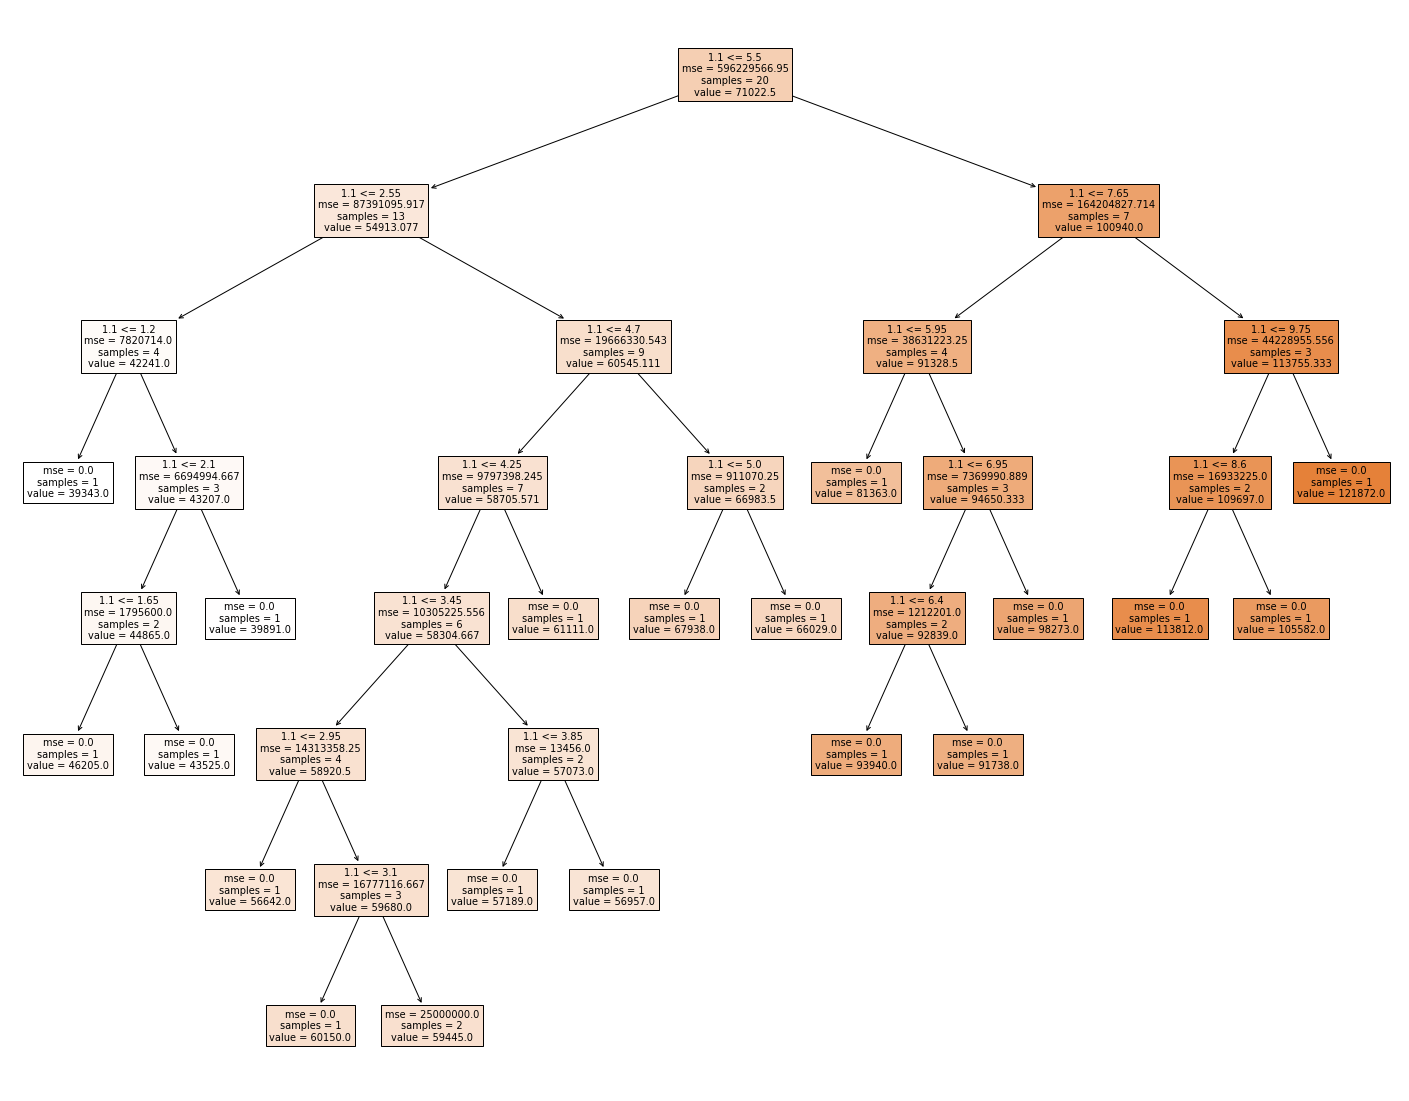

In [42]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=dataset["YearsExperience"],filled=True)

In [43]:
fig.savefig('DT.png')

# Random Forest Regressor

In [44]:
RF=RandomForestRegressor(n_estimators=20,random_state=0)

In [45]:
RF=RandomForestRegressor()

In [46]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
pred_RF=RF.predict(x_test)

In [48]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [49]:
pred_RF

array([ 44372.58      , 117138.04      ,  57972.85333333,  57528.27333333,
       109318.84      , 107551.45      , 109318.84      ,  57528.27333333,
        68397.87      , 109247.59      ])

In [50]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [51]:
diff_RF=y_test-pred_RF
res_RF=pd.concat([pd.Series(pred_RF),pd.Series(y_test),pd.Series(diff_RF)],axis=1)
res_RF.columns=['prediction','Original data','difference']

In [52]:
res_RF

,prediction,Original data,difference
0,44372.580000,37731.0,-6641.580000
1,117138.040000,122391.0,5252.960000
2,57972.853333,57081.0,-891.853333
3,57528.273333,63218.0,5689.726667
4,109318.840000,116969.0,7650.160000
5,107551.450000,109431.0,1879.550000
6,109318.840000,112635.0,3316.160000
7,57528.273333,55794.0,-1734.273333
8,68397.870000,83088.0,14690.130000
9,109247.590000,101302.0,-7945.590000


In [53]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred_RF))

In [54]:
rmse

6781.350623592375

In [55]:
RF.predict([[12]])

array([117138.04])

In [56]:
RF.predict([[4]])

array([57528.27333333])

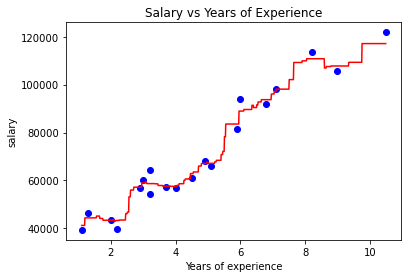

In [57]:
x_grid=np.arange(min(x),max(x),0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_grid,RF.predict(x_grid),color='red')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of experience")
plt.ylabel("salary")
plt.show()